In [1]:
from pysb import *
Model()

# Declare molecules
Monomer('GActin', ['wh2'])
Monomer('FActin', ['arp23'])
Monomer('Arp23', ['npf', 'filament'])
Monomer('NPF', ['monomer', 'arp23'])

# Declare parameters
nA = 6.022e23
volume = 50e-6
Parameter('k1af', 5.5e-6 * nA * volume)
Parameter('k1bf', 1.0e-6 * nA * volume)
Parameter('k1ar', 3.0)
Parameter('k1br', 0.4)
Parameter('k2af', 1.0e-6 * nA * volume)
Parameter('k2bf', 5.5e-6 * nA * volume)
Parameter('k2ar', 3.0)
Parameter('k2br', 0.4)
Parameter('k3f', 8.6e-6 * nA * volume)
Parameter('k3r', 0.01)
Parameter('k4', 0.034)

# Establish rules.
Rule('r1a', GActin(wh2 = None) + NPF(monomer = None, arp23 = None) | GActin(wh2 = 1) % NPF(monomer = 1, arp23 = None),
     k1af, k1ar)
Rule('r1b', Arp23(npf = None, filament = None) + NPF(monomer = None, arp23 = None) | Arp23(npf = 2, filament = None) % NPF(monomer = None, arp23 = 2),
     k1bf, k1br)
Rule('r2a',
     GActin(wh2 = 1) % NPF(monomer = 1, arp23 = None) + Arp23(npf = None, filament = None) | GActin(wh2 = 1) % NPF(monomer = 1, arp23 = 2) % Arp23(npf = 2, filament = None),
     k2af, k2ar)
Rule('r2b',
     Arp23(npf = 2, filament = None) % NPF(monomer = None, arp23 = 2) + GActin(wh2 = None) | Arp23(npf = 2, filament = None) % NPF(monomer = 1, arp23 = 2) % GActin(wh2 = 1),
     k2bf, k2br)
Rule('r3',
     Arp23(npf = 2, filament = None) % NPF(monomer = 1, arp23 = 2) % GActin(wh2 = 1) + FActin(arp23 = None) | Arp23(npf = 2, filament = 3) % NPF(monomer = 1, arp23 = 2) % GActin(wh2 = 1) % FActin(arp23 = 3),
     k3f, k3r)
Rule('r4',
     Arp23(npf = 2, filament = 3) % NPF(monomer = 1, arp23 = 2) % GActin(wh2 = 1) % FActin(arp23 = 3) >> Arp23(npf = None, filament = 3) % GActin(wh2 = None) % FActin(arp23 = 3) + NPF(monomer = None, arp23 = None),
     k4)

# Initial conditions.
Parameter('GActin_0', 2e-6 * nA * volume)
Parameter('FActin_0', 1.0)
Parameter('Arp23_0', 50e-9 * nA * volume)
Parameter('NPF_0', 300e-9 * nA * volume)
Initial(GActin(wh2 = None), GActin_0)
Initial(FActin(arp23 = None), FActin_0)
Initial(Arp23(npf = None, filament = None), Arp23_0)
Initial(NPF(monomer = None, arp23 = None), NPF_0)

# State observables
Observable('obsFActin', Arp23(npf = None, filament = 3) % GActin(wh2 = None) % FActin(arp23 = 3))
Observable('obsGActin', GActin(wh2 = None))

Observable('obsGActin', GActin(wh2=None))

In [2]:
from pysb.simulator import ScipyOdeSimulator
from numpy import linspace

t = linspace(0.0, 500.0, 1000)
simres = ScipyOdeSimulator(model, tspan = t).run()
yout = simres.all

/home/jiongyi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

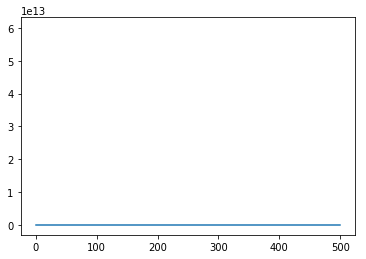

In [4]:
%matplotlib inline
from matplotlib.pyplot import plot, legend, xlabel, ylabel
plot(t, yout['obsFActin'])
plot(t, yout['obsGActin'])